In [118]:
using fermions, Plots, Measures
Plots.theme(:dark)

In [2]:
function SSHHamiltonian(t_ratio, numSites)
    hamiltonian = Tuple{String, Vector{Int64}, Float64}[]
    for i in 1:2:2*numSites-1
        push!(hamiltonian, ("+-", [i, i+1], t_ratio))
        push!(hamiltonian, ("+-", [i+1, i], t_ratio))
    end
    for i in 2:2:2*numSites-1
        push!(hamiltonian, ("+-", [i, i+1], 1.0))
        push!(hamiltonian, ("+-", [i+1, i], 1.0))
    end
    return hamiltonian
end

SSHHamiltonian (generic function with 1 method)

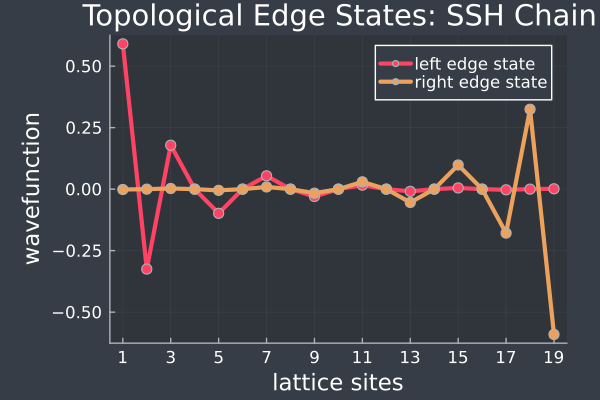

In [120]:
function PlotEdgeStates(t_ratio, numSites)
    basis = fermions.BasisStates(2 * numSites, 1)
    basisVectors = [collect(keys(b))[1] for b in basis]
    
    sshHamiltonian = SSHHamiltonian(t_ratio, numSites)
    eigVals, eigStates = fermions.Spectrum(sshHamiltonian, basis)
    edgeIndices = findall(x -> abs(x) in sort(abs.(eigVals))[1:2], eigVals)
    edgeStates = [Float64[] for _ in edgeIndices]
    for (i, index) in enumerate(edgeIndices)
        for v in basisVectors
            if v in keys(eigStates[index])
                push!(edgeStates[i], eigStates[index][v])
            end
        end
    end

    p = Plots.plot(1:19, [edgeStates[1][1:div(end, 4)], edgeStates[2][3 * div(end, 4)+1:end]], 
        linewidth=3, thickness_scaling=1.4, margin=-2mm, rightmargin=4mm,
        xlabel="lattice sites", ylabel="wavefunction",
        markershape=:circle, labels=["left edge state" "right edge state"],
        title="Topological Edge States: SSH Chain", xticks=1:2:19,
    )
    savefig(p, "images/sshEdge.svg")
    display(p)
end
PlotEdgeStates(0.55, 40)